In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
fields = df.columns.tolist()
fields

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [7]:
import numpy as np
data = df['Night Calls'].tolist()
norm_data = list()

mean_y = np.mean(data)
std_y = np.std(data)

for y in data:
    norm_y = (y - mean_y)/std_y
    norm_data.append(norm_y)

print("Min Z-score : " + str(min(norm_data)))
print("Max Z-score : " + str(max(norm_data)))

Min Z-score : -3.4298696965828364
Max Z-score : 3.827738875049051


In [8]:
categorical_object = pd.cut(data, 7)

In [9]:
x = list()
y = list()
for index, d in enumerate(data):
    x.append(d)
    y.append(str(categorical_object[index]))

In [10]:
categories = list(set(y))
new_x = categories
new_y = list()
for x_val_new in new_x:
    freq = 0
    for y_val in y:
        if x_val_new == y_val:
            freq += 1
    new_y.append(freq)

In [11]:
print(new_x)

['(114.143, 134.429]', '(73.571, 93.857]', '(93.857, 114.143]', '(32.858, 53.286]', '(154.714, 175.0]', '(134.429, 154.714]', '(53.286, 73.571]']


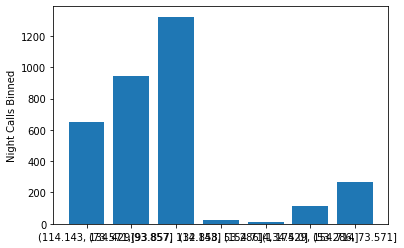

In [14]:
import matplotlib.pyplot as plt
plt.bar(new_x, new_y)
plt.ylabel('Night Calls Binned')
plt.show()

In [15]:
bins = pd.qcut(data, 5)

In [16]:
x = list()
y = list()
for index, d in enumerate(data):
    x.append(d)
    y.append(str(bins[index]))

In [17]:
categories = list(set(y))
new_x = categories
new_y = list()
for x_val_new in new_x:
    freq = 0
    for y_val in y:
        if x_val_new == y_val:
            freq += 1
    new_y.append(freq)

In [18]:
print(new_x)

['(83.0, 95.0]', '(95.0, 105.0]', '(117.0, 175.0]', '(32.999, 83.0]', '(105.0, 117.0]']


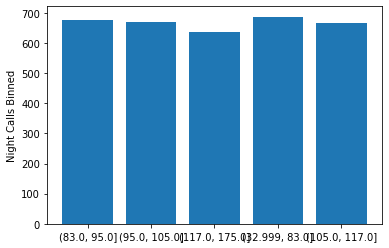

In [19]:
plt.bar(new_x, new_y)
plt.ylabel('Night Calls Binned')
plt.show()

In [20]:
from sklearn.cluster import KMeans

data_array = list()
for d in data:
    data_array.append([d])
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_array)

In [21]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[3 2 2 ... 3 4 3]
[[117.16470588]
 [ 67.71105528]
 [101.59924027]
 [ 85.87769784]
 [135.94699647]]


In [22]:
x = list()
y = list()
for index, d in enumerate(data):
    x.append(d)
    l = kmeans.labels_[index]
    c = str(kmeans.cluster_centers_[l])
    y.append(c)

In [23]:
categories = list(set(y))
new_x = categories
new_y = list()
for x_val_new in new_x:
    freq = 0
    for y_val in y:
        if x_val_new == y_val:
            freq += 1
    new_y.append(freq)

In [24]:
print(new_x)

['[117.16470588]', '[101.59924027]', '[135.94699647]', '[85.87769784]', '[67.71105528]']


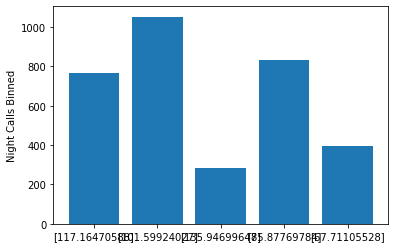

In [26]:
plt.bar(new_x, new_y)
plt.ylabel('Night Calls Binned')
plt.show()